In [1]:
%load_ext autoreload
%autoreload 2

# Low Multicollinearity | RF better perfomance

In [2]:
import sys
sys.path.append('../')
import tokamakTK
from tokamakTK import MyCounter, HUEOrder

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels.api as sm
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px
import plotly.subplots as plsp
import plotly.graph_objects as go
from plotly.subplots import make_subplots


from collections import Counter

pd.set_option('display.max_columns', None)
plt.rc('font',family = 'serif')
path = "../data/"

In [3]:
# Obtained from Optimization
min_subset_ids = pd.read_csv(path+"R_ids_alpha_0.6357.csv")

DB2 = pd.read_csv(path+"DB2P8.csv")
DB5 = pd.read_csv(path+"SELDB5_SVD.csv", low_memory=False) 

# Setting ELMy Dataset
DB5 = DB5[DB5["PHASE"].isin(['HGELM', 'HSELM', 'HGELMH', 'HSELMH'])]

# REMOVING SPHERICAL TOKAMAKS
#DB5 = DB5[~DB5.TOK.isin(['MAST', 'NSTX', 'START'])]

# There is two shots from DB2P8 missing in DB5
missing_shots = DB2[~DB2.id.isin( DB5.id.values )].reset_index(drop=True)
DB5 = pd.concat([DB5, missing_shots], axis=0, ignore_index=True)

# Labeling shots that had great impact in decreasing alpha_R
DB5.insert(loc=2,column="label",value=["Unaffected"]*len(DB5))
DB5.loc[(DB5[DB5.id.isin(min_subset_ids.id)].index), "label"] = "Decreasing"

print(
    f"{ round( (len(min_subset_ids)/len(DB5))*100     ,2)  }% of the data decreased alpha_R\n" + 
    f"{ round( (1 - len(min_subset_ids)/len(DB5))*100 ,2)  }% of the data did not decrease alpha_R"
)

23.45% of the data decreased alpha_R
76.55% of the data did not decrease alpha_R


In [4]:
DB5 = tokamakTK.clean_categorical_data(DB5)

In [5]:
# alpha_R -- 0.6358 --> when considering DB2 for calculation
data1 = DB5[DB5.label.isin(["Unaffected"])].reset_index(drop=True)
# alpha_R -- 2.1246 --> when considering DB2 for calculation
data2 = DB5[DB5.label.isin(["Decreasing"])]
# Removing DB2, because most of these shots have missing info
#data2 = data2[~data2.id.isin(DB2.id.values)].reset_index(drop=True)

data = [data1,data2]

In [6]:
#tokamakTK.get_regression(data1, DB2)[1].summary()

In [7]:
# Needed for Improved Visualization: 2D and 3D Plots

HUE_ORDER, PX_ORDER = tokamakTK.get_colors_per_category(DB5)
hue_order = HUEOrder(HUE_ORDER)

### Feature Importance, not in order

``` Python
features = ['BETASTAR','BT','DWDIA','ENBI','HYBRID','IP','KAREA','LHTIME',
            'MEFF','NEL','NUSTAR','PECRH','PFLOSS','PICRH','PLTH','POHM','PRAD',
            'QCYL5','RHOSTAR','TAV','WFICFORM']
```
* `BETASTAR`: normalized plasma beta
* `BT`: toroidal magnetic field
* `DWDIA`: Time rate of change of the total plasma stored energy
* `ENBI`: Neutral beam energy weighted by power
* `HYBRID`: Flag for indicating whether the time point is a HYBRID mode
* `IP`: Plasma current
* `KAREA`: Plasma elongation
* `LHTIME`: L-H transition time
* `MEFF`: Effective atomic mass in AMU
* `NEL`: Central line average electron density
* `NUSTAR`: Normalized Ion Collision Frequency
* `PECRH`: ECRH power absorbed by the plasma
* `PFLOSS`:  Neutral beam power that is lost from the plasma through charge exchange and unconfined orbits
* `PICRH`: iCRH power absorbed by the plasma
* `PLTH`: Estimated Loss Power corrected for charge exchange and unconfined orbit losses
* `POHM`: Total Ohmic power
* `PRAD`: Total radiated power as measured by Bolometer
* `QCYL5`: Cylindrical, the plasma safety factor at the 95% poloidal flux surface
* `RHOSTAR`: Normalized Ion Gyroradius
* `TAV`: **Total averaged temperature**
* `WFICFORM`: Total fast ion energy due to ICRH estimated from approximate formula

# MAIN 5 PARAMETERS

```Python
['RHOSTAR', 'TAV', 'NUSTAR', 'LHTIME', 'QCYL5'] | Impurity
['RHOSTAR', 'TAV', 'LHTIME', 'NUSTAR', 'QCYL5'] | Permutation
```

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


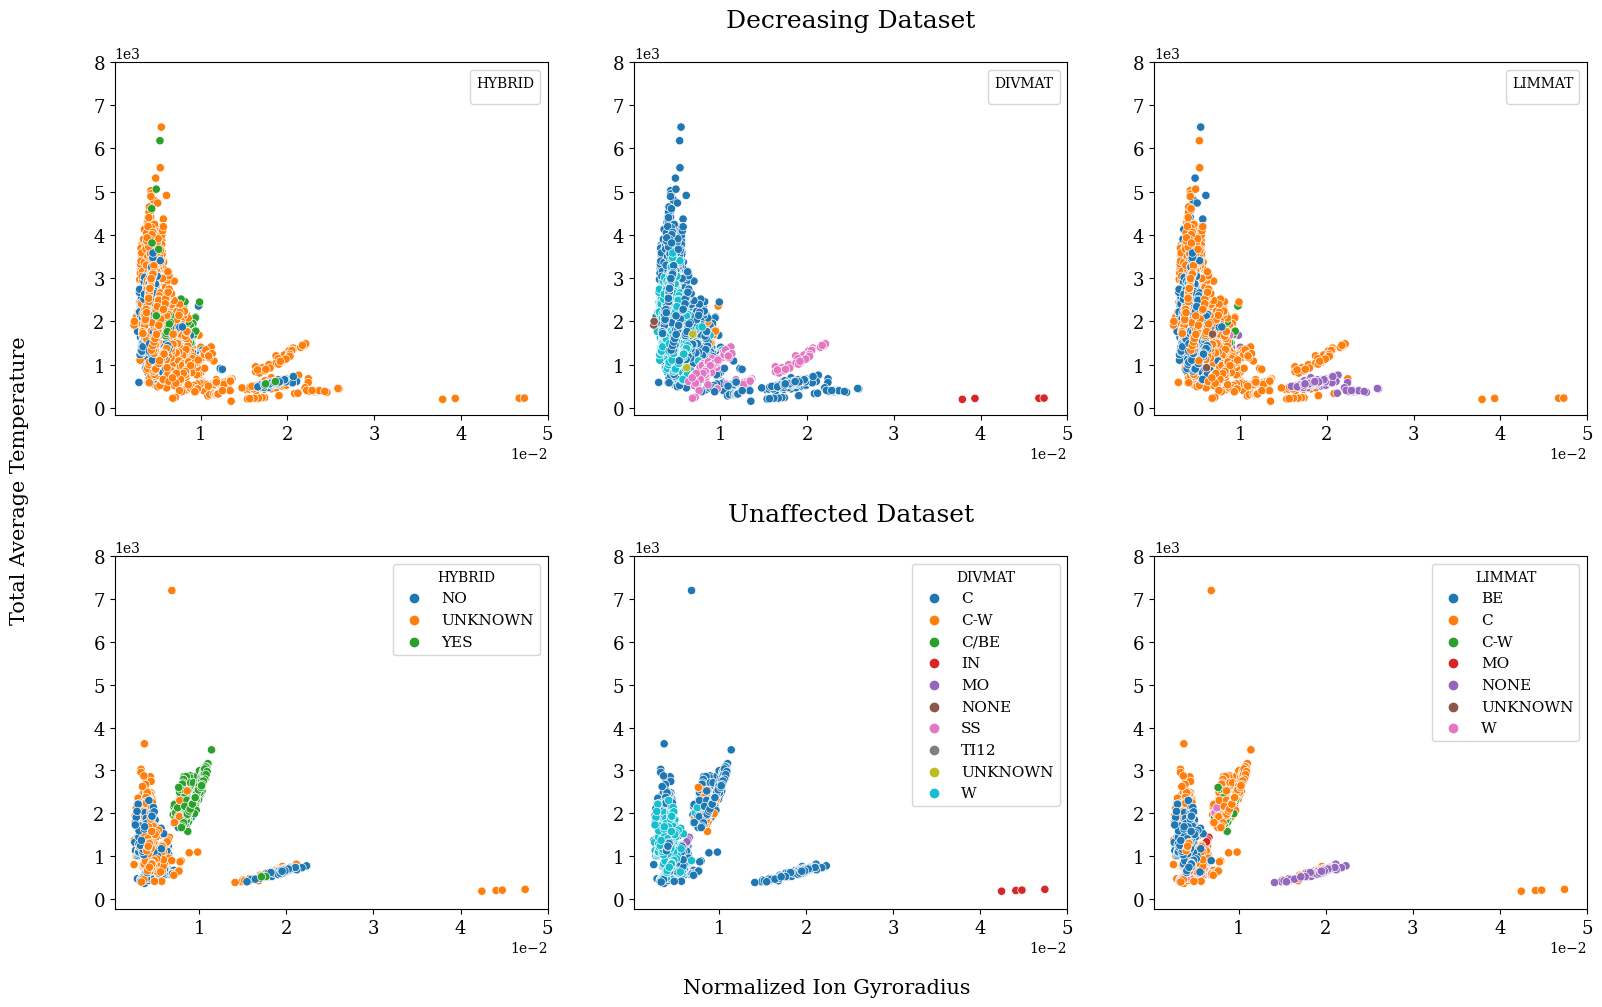

In [8]:
# RHOSTAR vs TAV

params = {
    "HUE_ORDER": HUE_ORDER,
    "cat_params": ["HYBRID", "DIVMAT", "LIMMAT"],
    "xy__params": ["RHOSTAR", "TAV"],
    "x___label": "Normalized Ion Gyroradius" ,
    "y___label": "Total Average Temperature",
    "plot_size": (19, 11),
    "legend_pos": "upper right",
    "x__minmax": (None, 5e-2),
    "y__minmax": (None, 8e3),
    "fig_format": "pdf",
    "save_fig": False
}

tokamakTK.scatter_data_comparison(data, params)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


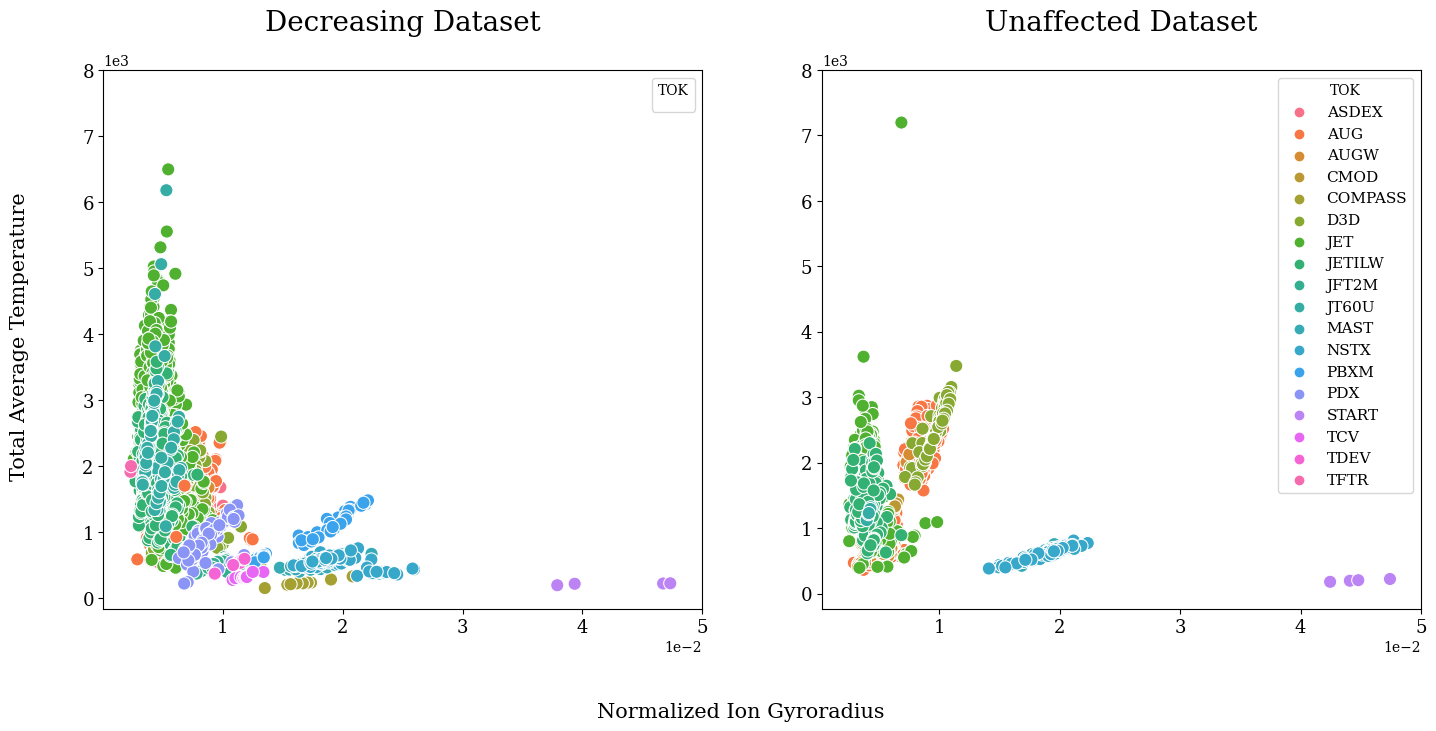

In [9]:
params = {
    "HUE_ORDER": HUE_ORDER,
    "cat_params": ["TOK"] ,
    "xy__params": ["RHOSTAR", "TAV"],
    "x___label": "Normalized Ion Gyroradius" ,
    "y___label": "Total Average Temperature",
    "plot_size": (17, 7),
    "legend_pos": "upper right",
    "x__minmax": (None, 5e-2),
    "y__minmax": (None, 8e3),
    "fig_format": "pdf",
    "save_fig": False
}

tokamakTK.scatter_data_comparison(data, params)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


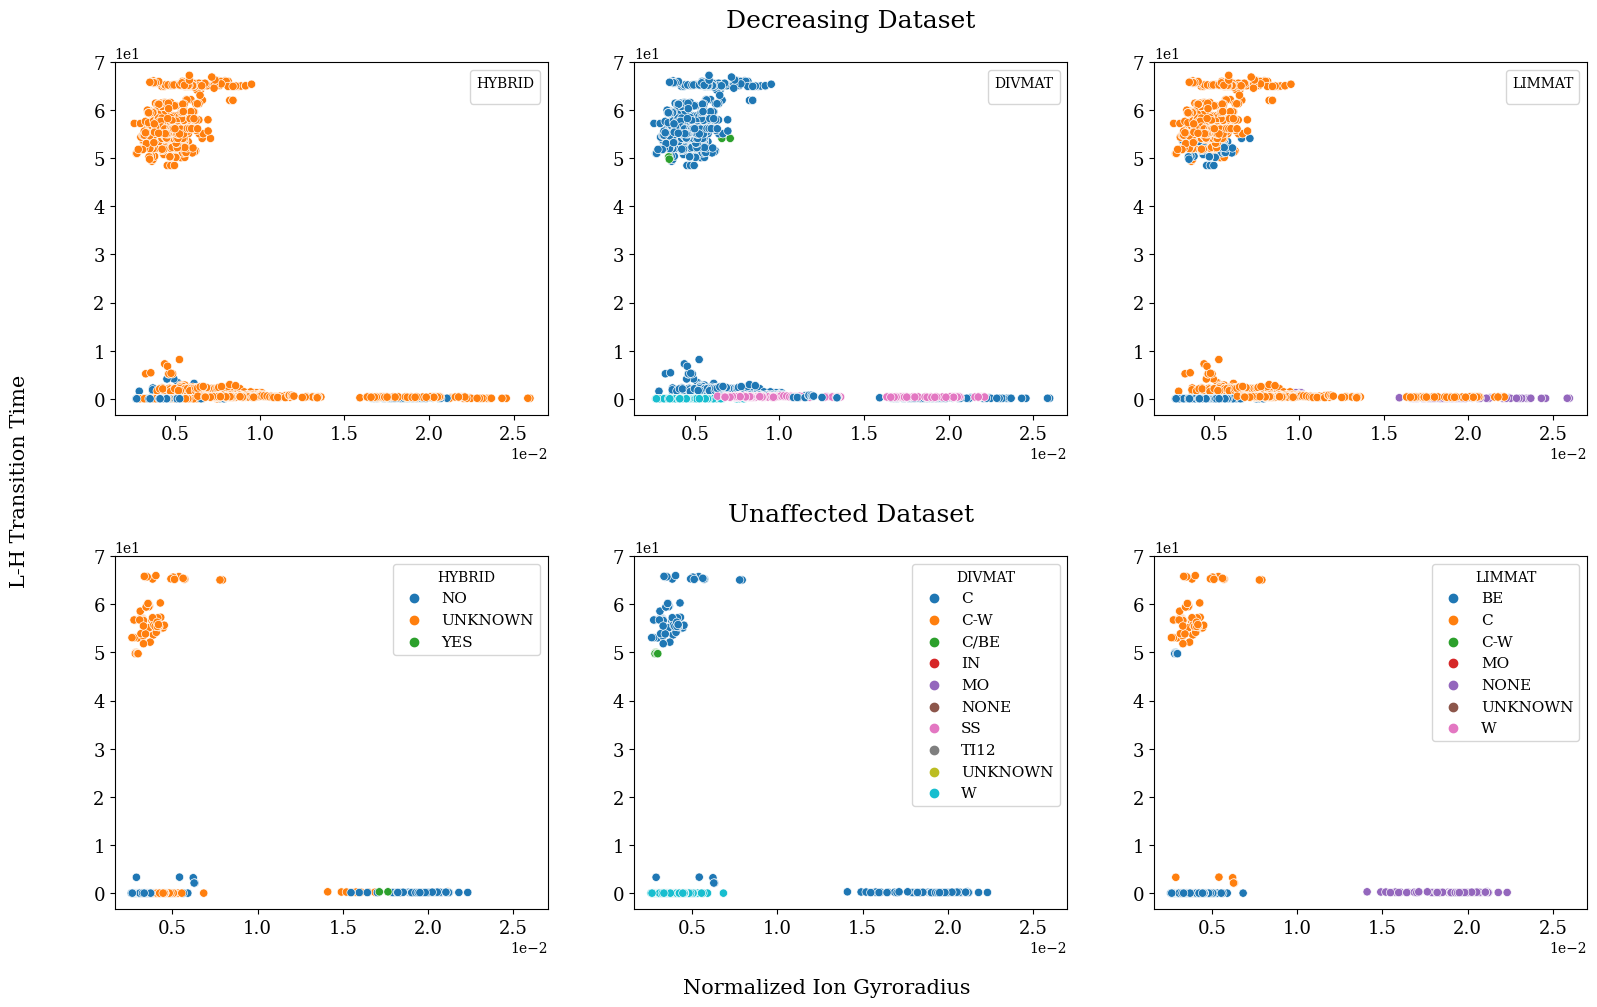

In [10]:
# RHOSTAR vs LHTIME

params = {
    "HUE_ORDER": HUE_ORDER,
    "cat_params": ["HYBRID", "DIVMAT", "LIMMAT"] ,
    "xy__params": ["RHOSTAR", "LHTIME"],
    "x___label": "Normalized Ion Gyroradius" ,
    "y___label": "L-H Transition Time",
    "plot_size": (19, 11),
    "legend_pos": "upper right",
    "x__minmax": (None, 2.7e-2),
    "y__minmax": (None, 7e1),
    "fig_format": "pdf",
    "save_fig": False
}

tokamakTK.scatter_data_comparison(data, params)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


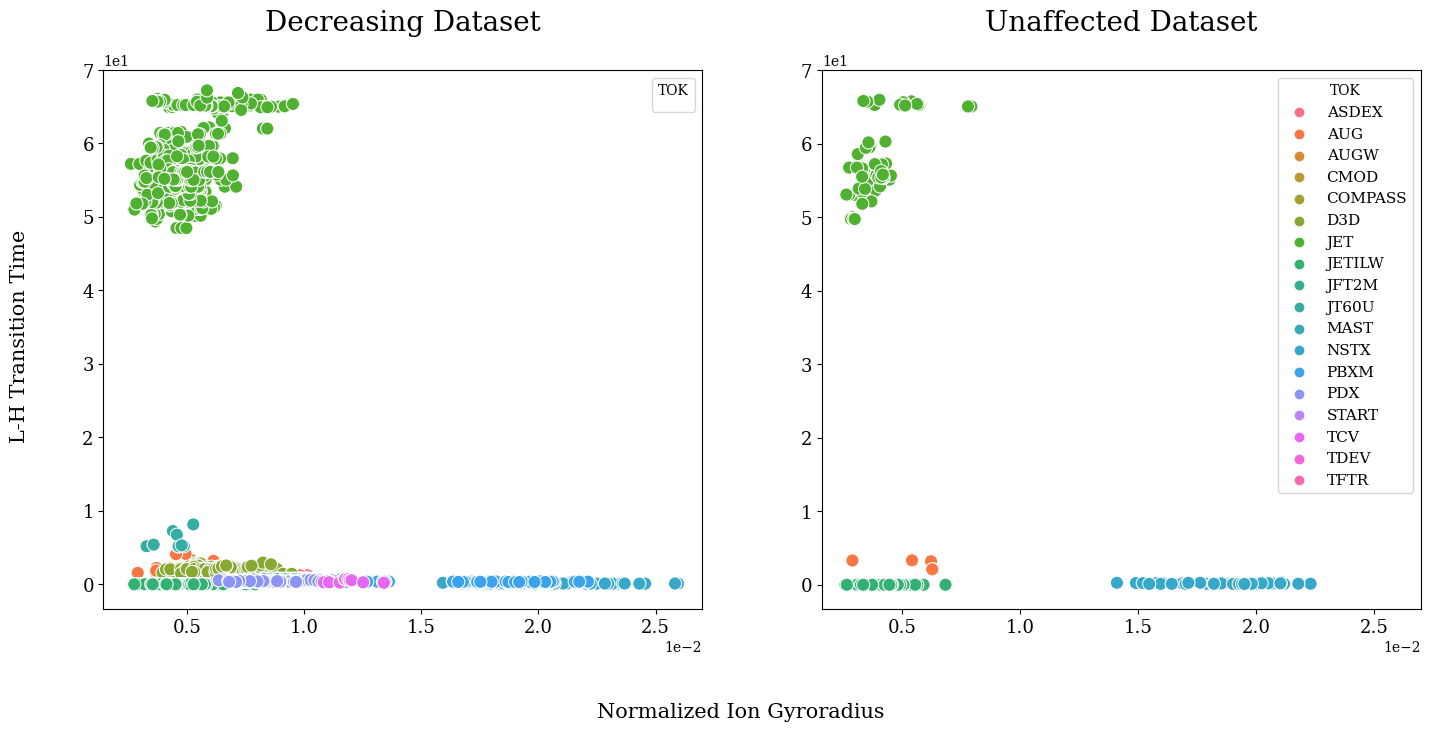

In [11]:
params = {
    "HUE_ORDER": HUE_ORDER,
    "cat_params": ["TOK"] ,
    "xy__params": ["RHOSTAR", "LHTIME"],
    "x___label": "Normalized Ion Gyroradius" ,
    "y___label": "L-H Transition Time",
    "plot_size": (17, 7),
    "legend_pos": "upper right",
    "x__minmax": (None, 2.7e-2),
    "y__minmax": (None, 7e1),
    "fig_format": "pdf",
    "save_fig": False
}

tokamakTK.scatter_data_comparison(data, params)

In [12]:
# Removing Spherical Toks
px.scatter_3d(data_frame=DB5[~DB5.TOK.isin(['MAST', 'NSTX', 'START'])], 
              x="RHOSTAR", y="TAV", z="NUSTAR", 
              color="label", color_discrete_map={"Decreasing":"red","Unaffected":"black"})

In [13]:
# Removing Spherical Toks
px.scatter_3d(data_frame=DB5[~DB5.TOK.isin(['MAST', 'NSTX', 'START'])], 
              x="RHOSTAR", y="LHTIME", z="NUSTAR", 
              color="label", color_discrete_map={"Decreasing":"red","Unaffected":"black"})

In [14]:
# Removing Spherical Toks
px.scatter_3d(data_frame= DB5, #DB5[~DB5.TOK.isin(['MAST', 'NSTX', 'START'])], 
              x="RHOSTAR", y="LHTIME", z="NUSTAR", 
              color="label", color_discrete_map={"Decreasing":"red","Unaffected":"black"})

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


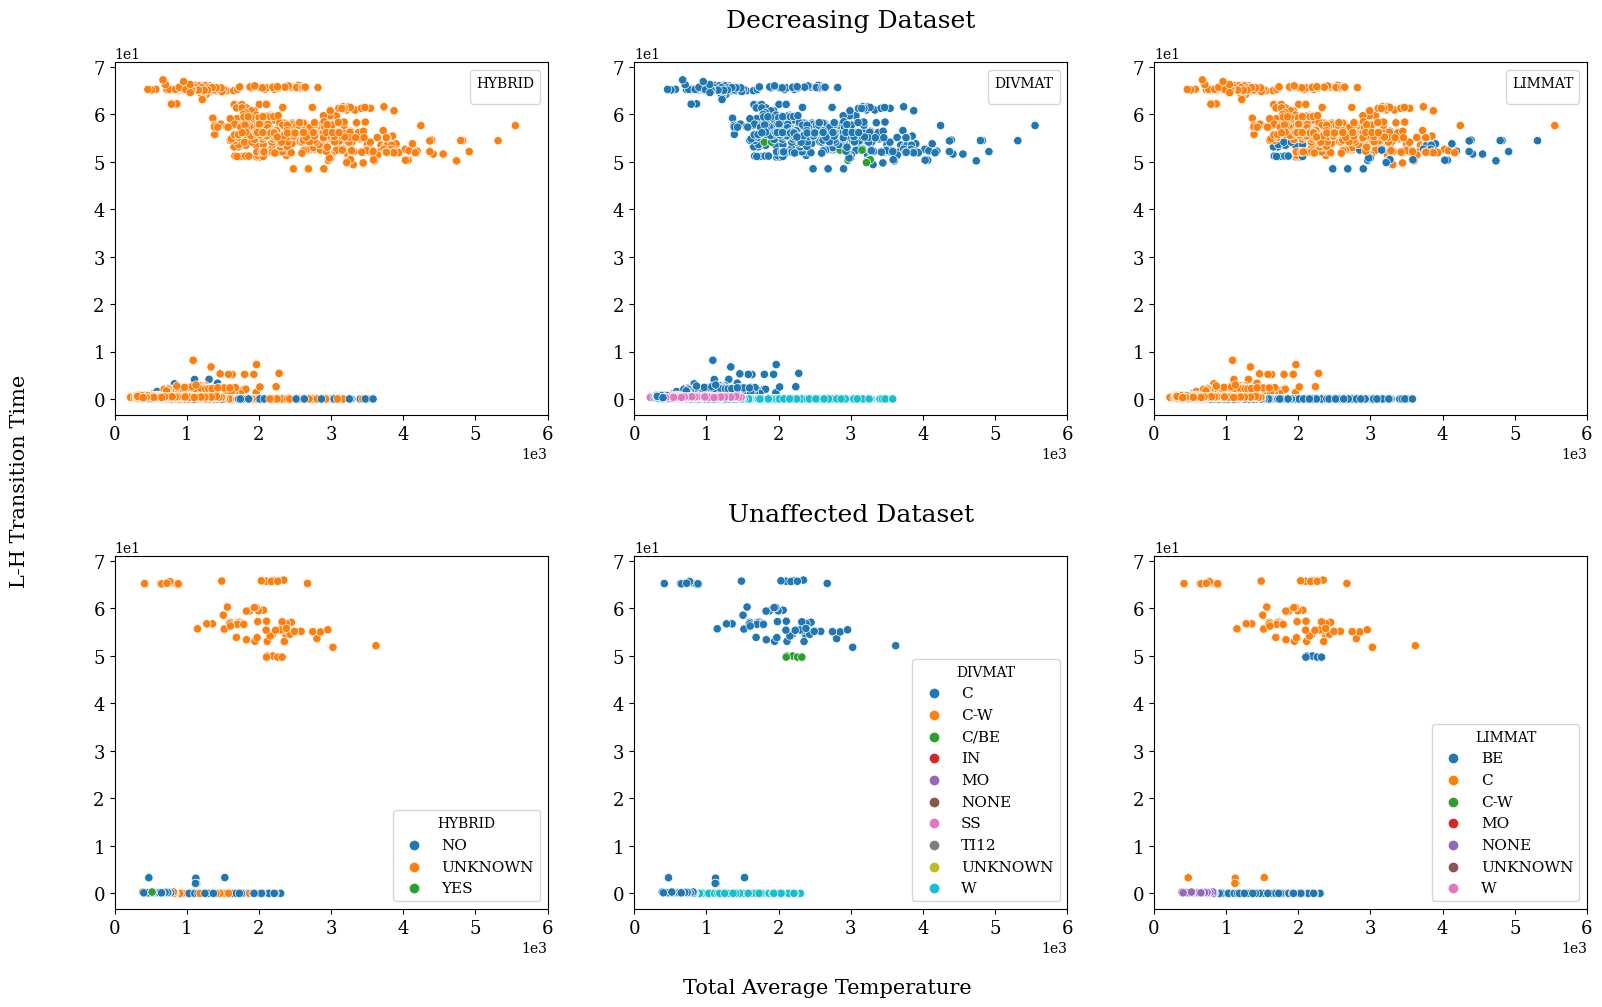

In [15]:
# TAV vs LHTIME

params = {
    "HUE_ORDER": HUE_ORDER,
    "cat_params": ["HYBRID", "DIVMAT", "LIMMAT"] ,
    "xy__params": ["TAV", "LHTIME"],
    "x___label": "Total Average Temperature" ,
    "y___label": "L-H Transition Time",
    "plot_size": (19, 11),
    "x__minmax": (0, 6e3),
    "y__minmax": (None, 7.1e1),
    "legend_pos": "lower right",
    "fig_format": "pdf",
    "save_fig": False
}

tokamakTK.scatter_data_comparison(data, params)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


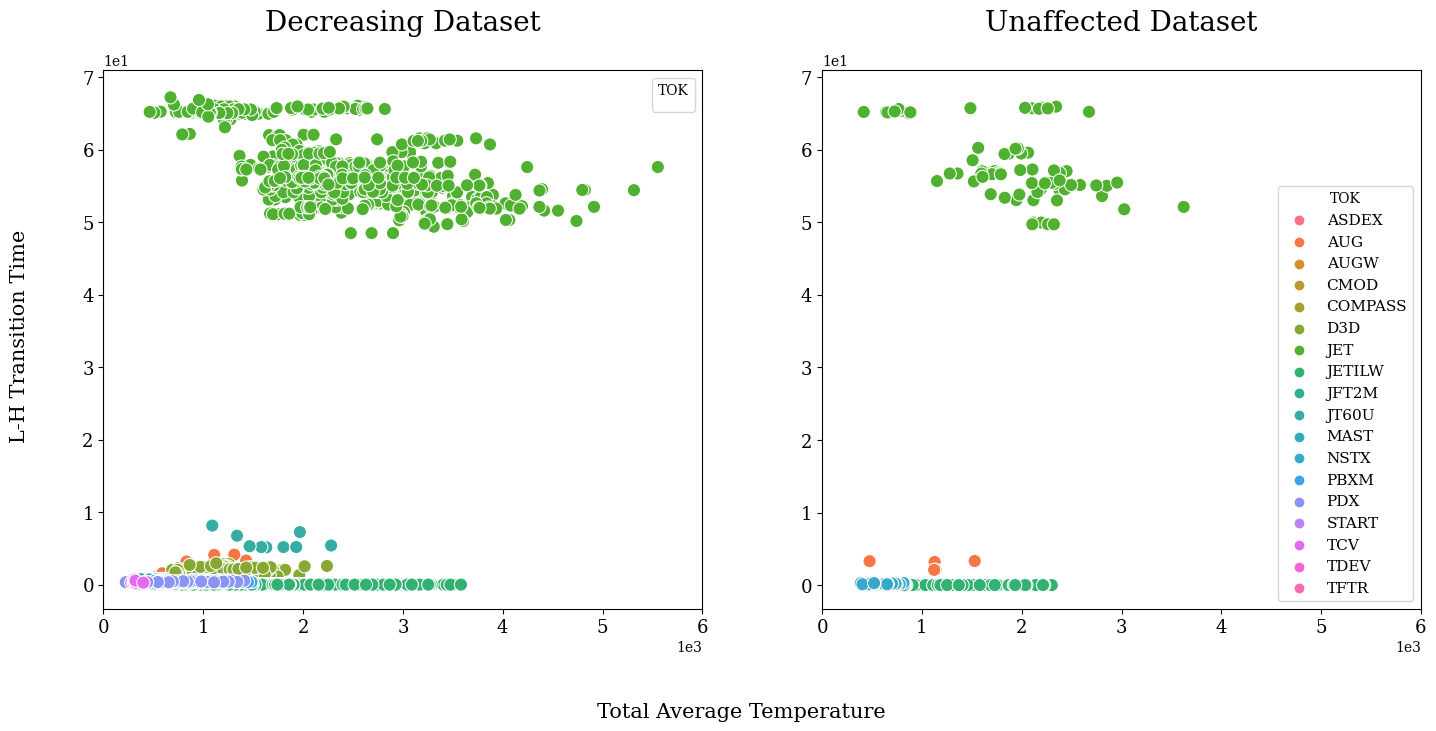

In [16]:
params = {
    "HUE_ORDER": HUE_ORDER,
    "cat_params": ["TOK"] ,
    "xy__params": ["TAV", "LHTIME"],
    "x___label": "Total Average Temperature" ,
    "y___label": "L-H Transition Time",
    "plot_size": (17, 7),
    "x__minmax": (0, 6e3),
    "y__minmax": (None, 7.1e1),
    "legend_pos": "lower right",
    "fig_format": "pdf",
    "save_fig": False
}

tokamakTK.scatter_data_comparison(data, params)